In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
y_test_df = pd.read_csv("./data/y_test.csv")

## 사용하지 않는 피쳐 제거

In [3]:
features_to_drop = [
    "id",
    "name",
    "host_id",
    "host_name",
    "calculated_host_listings_count",
    "neighbourhood",
    "availability_365",
    "last_review",
]
train_df = train_df.drop(columns=features_to_drop)
test_df = test_df.drop(columns=features_to_drop)

## 피쳐 전처리

### 지리적 정보

#### neighbourhood_group

In [4]:
print("neighbourhood_group values")
display(train_df["neighbourhood_group"].value_counts())


train_df = pd.get_dummies(train_df, columns=["neighbourhood_group"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["neighbourhood_group"], drop_first=True)

print("precessed neighbourhood_group")
display(train_df.iloc[:10, -4:])
display(test_df.iloc[:10, -4:])

neighbourhood_group values


neighbourhood_group
Manhattan        17331
Brooklyn         16081
Queens            4530
Bronx              884
Staten Island      290
Name: count, dtype: int64

precessed neighbourhood_group


,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,True,False,False,False
4,True,False,False,False
5,False,True,False,False
6,True,False,False,False
7,False,True,False,False
8,True,False,False,False
9,False,False,False,False


,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,True,False,False,False
1,False,True,False,False
2,True,False,False,False
3,True,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,True,False
7,False,False,True,False
8,True,False,False,False
9,False,True,False,False


#### latitude

<Axes: xlabel='latitude', ylabel='Count'>

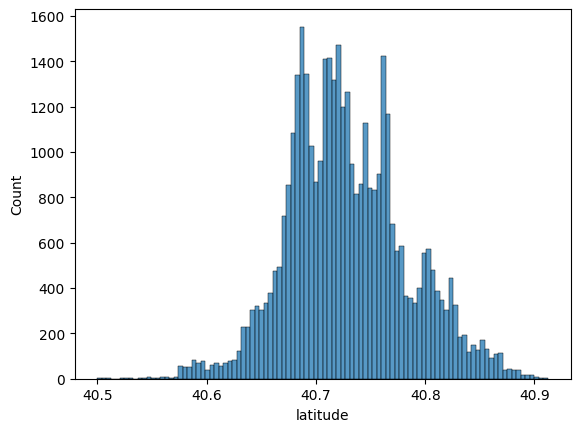

In [5]:
"""
정규 분포의 형태를 띄고 있어서 따로 처리하진 않는다
"""

sns.histplot(train_df, x="latitude", bins=100)

#### longitude

<Axes: xlabel='longitude', ylabel='Count'>

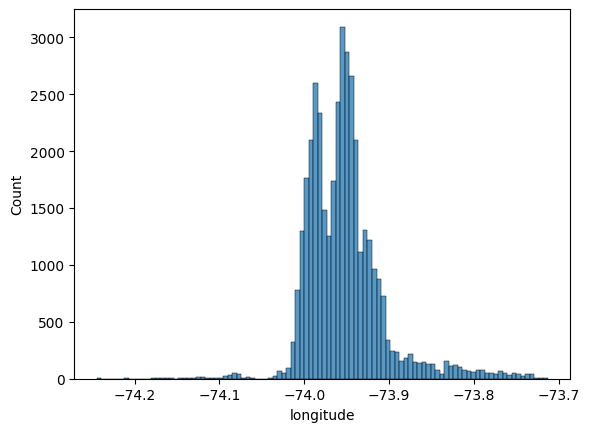

In [6]:
"""
정규 분포의 형태를 띄고 있어서 따로 처리하진 않는다
"""

sns.histplot(train_df, x="longitude", bins=100)

### 숙소 정보

#### room_type

In [7]:
print("room_type values")
display(train_df["room_type"].value_counts())

train_df = pd.get_dummies(train_df, columns=["room_type"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["room_type"], drop_first=True)

print("precessed room_type")
display(train_df.iloc[:10, -2:])
display(test_df.iloc[:10, -2:])

room_type values


room_type
Entire home/apt    20299
Private room       17876
Shared room          941
Name: count, dtype: int64

precessed room_type


,room_type_Private room,room_type_Shared room
0,True,False
1,False,False
2,False,False
3,False,False
4,True,False
5,False,False
6,False,False
7,True,False
8,True,False
9,True,False


,room_type_Private room,room_type_Shared room
0,True,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,True,False
7,True,False
8,True,False
9,True,False


#### minimum_nights

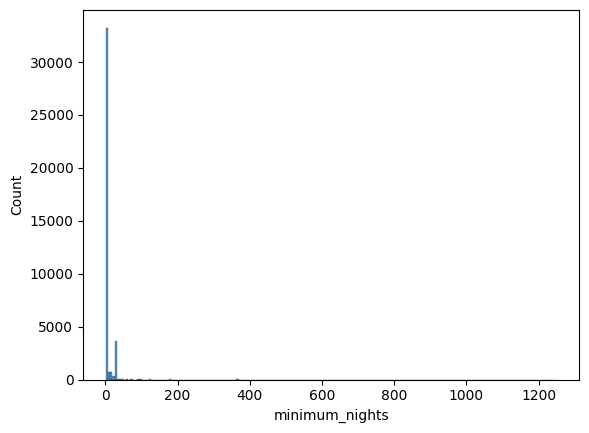

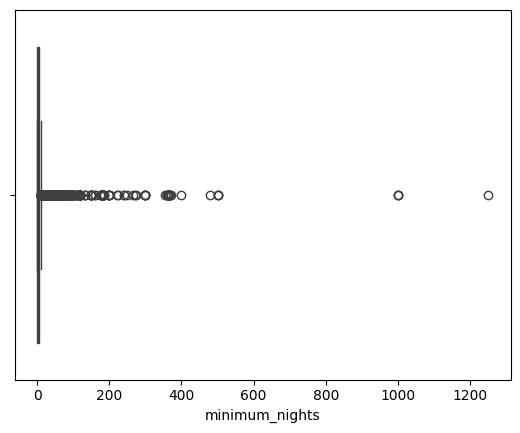

count    39116.000000
mean         6.990720
std         20.310323
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

# of minimum_nights > 300: 38 (total: 39116)
# of minimum_nights > 400: 8 (total: 39116)
# of minimum_nights > 500: 4 (total: 39116)
# of minimum_nights > 600: 4 (total: 39116)
# of minimum_nights > 700: 4 (total: 39116)
# of minimum_nights > 800: 4 (total: 39116)
# of minimum_nights > 900: 4 (total: 39116)


In [8]:
"""
데이터 분포 확인

1. 최소값에 많이 치우친 형태를 확인할 수 있다.
2. 상대적으로 매우 큰 값의 이상치가 존재한다.
"""

sns.histplot(train_df, x="minimum_nights", bins=200)
plt.show()

sns.boxplot(train_df, x="minimum_nights")
plt.show()

display(train_df["minimum_nights"].describe())

for i in range(300, 1000, 100):
    data_count = len(train_df[train_df["minimum_nights"] > i])
    print(f"# of minimum_nights > {i}: {data_count} (total: {len(train_df)})")
    

<Axes: xlabel='minimum_nights_lte_400_sqrt', ylabel='Count'>

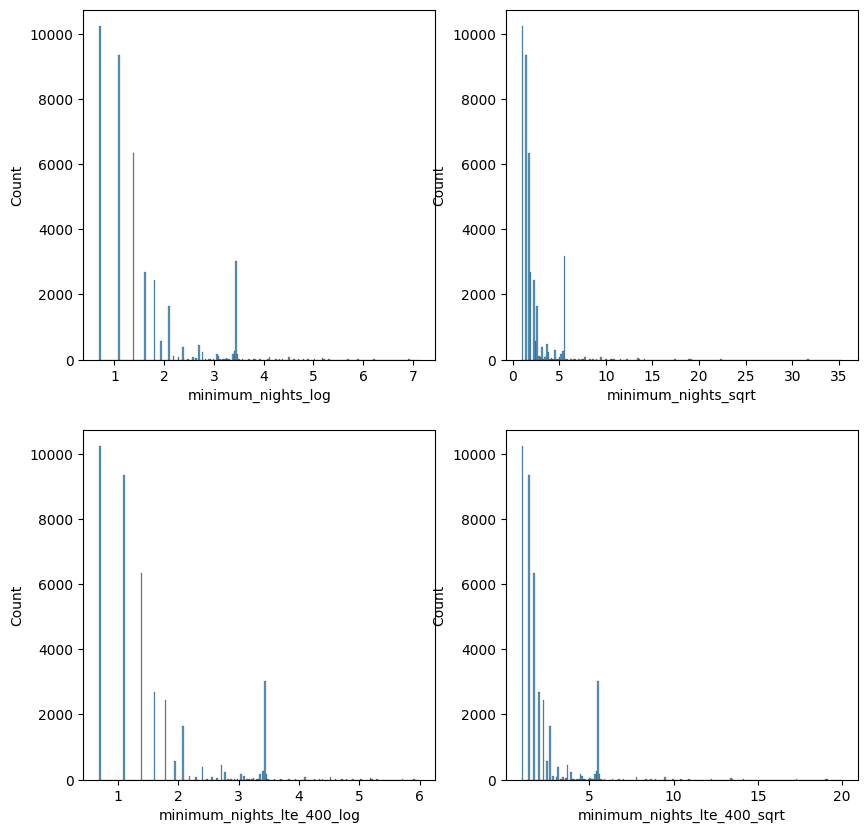

In [9]:
"""
전처리

- 이상치 기준을 400으로 두고 이를 제외한 다음, log 처리하는게 데이터 분포가 좀 더 고르게 되는 경향이 있다.
"""

import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# 이상치 제거 전
temp_df = train_df.copy()
temp_df["minimum_nights_log"] = np.log1p(temp_df["minimum_nights"])
temp_df["minimum_nights_sqrt"] = np.sqrt(temp_df["minimum_nights"])

sns.histplot(temp_df, x="minimum_nights_log", bins=200, ax=axes[0][0])
sns.histplot(temp_df, x="minimum_nights_sqrt", bins=200, ax=axes[0][1])

# 이상치 제거 후
temp_df = train_df.copy()
temp_df = temp_df.drop(
    train_df[train_df["minimum_nights"] > 400].index
)
temp_df["minimum_nights_lte_400_log"] = np.log1p(temp_df["minimum_nights"])
temp_df["minimum_nights_lte_400_sqrt"] = np.sqrt(temp_df["minimum_nights"])

sns.histplot(temp_df, x="minimum_nights_lte_400_log", bins=200, ax=axes[1][0])
sns.histplot(temp_df, x="minimum_nights_lte_400_sqrt", bins=200, ax=axes[1][1])

In [10]:
# 이상치 제거
train_df = train_df.drop(
    train_df[train_df["minimum_nights"] > 400].index
)

# log 변환
train_df["minimum_nights"] = np.log1p(train_df["minimum_nights"])
test_df["minimum_nights"] = np.log1p(test_df["minimum_nights"])

### 리뷰 정보

#### number_of_reviews, reviews_per_month

In [11]:
"""
차원 축소

- 'reviews_per_month'의 결측치가 많아서 PCA와 같은 차원 축소 대신 컬럼 제거
"""
print("리뷰 데이터 상관관계 확인")
display(train_df[["number_of_reviews", "reviews_per_month"]].corr())

print("결측치 확인")
display(train_df[["number_of_reviews", "reviews_per_month"]].isna().sum())

train_df = train_df.drop(columns=["reviews_per_month"])
test_df = test_df.drop(columns=["reviews_per_month"])

리뷰 데이터 상관관계 확인


,number_of_reviews,reviews_per_month
number_of_reviews,1.000000,0.547773
reviews_per_month,0.547773,1.000000


결측치 확인


number_of_reviews       0
reviews_per_month    7991
dtype: int64

<Axes: xlabel='number_of_reviews_log', ylabel='Count'>

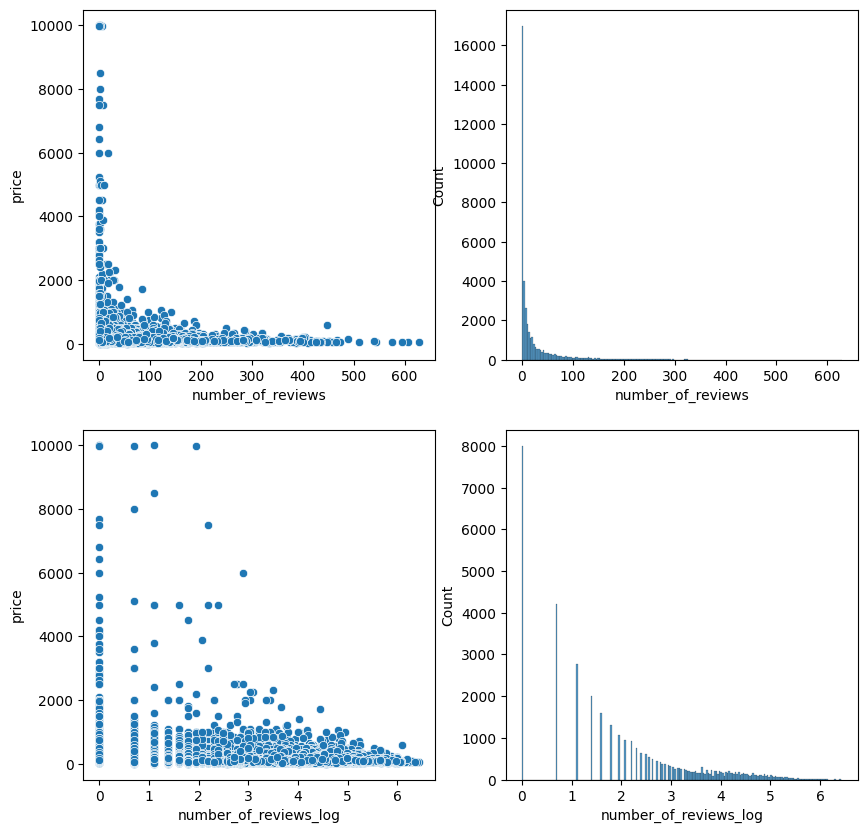

In [12]:
"""
전처리

- log 처리를 한 뒤에도 분포가 한쪽으로 치우친 경향이 있긴 하지만 어느정도 분포가 완만한 모양을 그리는 것을 확인할 수 있다.
"""
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

temp_df = train_df.copy()
temp_df["number_of_reviews_log"] = np.log1p(temp_df["number_of_reviews"])

# 원본 데이터
sns.scatterplot(temp_df, x="number_of_reviews", y="price", ax=axes[0][0])
sns.histplot(temp_df, x="number_of_reviews", bins=200, ax=axes[0][1])

# 로그 변환 처리 데이터
sns.scatterplot(temp_df, x="number_of_reviews_log", y="price", ax=axes[1][0])
sns.histplot(temp_df, x="number_of_reviews_log", bins=200, ax=axes[1][1])

In [13]:
train_df["number_of_reviews"] = np.log1p(train_df["number_of_reviews"])
test_df["number_of_reviews"] = np.log1p(test_df["number_of_reviews"])

### 타겟 데이터

#### price

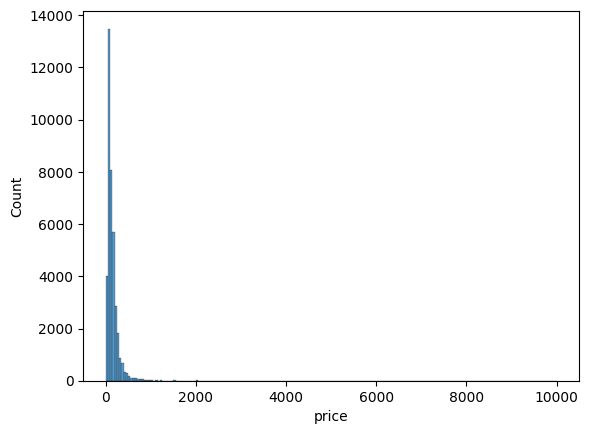

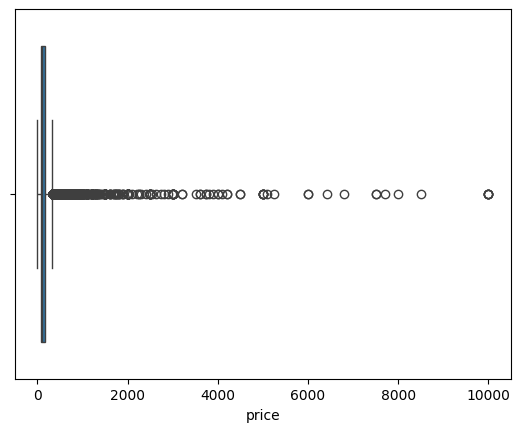

count    39108.000000
mean       152.758719
std        241.775640
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

# of price > 1000: 184 (total: 39108)
# of price > 2000: 66 (total: 39108)
# of price > 3000: 38 (total: 39108)
# of price > 4000: 27 (total: 39108)
# of price > 5000: 16 (total: 39108)
# of price > 6000: 12 (total: 39108)
# of price > 7000: 10 (total: 39108)
# of price > 8000: 6 (total: 39108)
# of price > 9000: 5 (total: 39108)
# of price > 10000: 0 (total: 39108)


In [14]:
"""
데이터 분포 확인

1. 최소값에 많이 치우친 형태를 확인할 수 있다.
2. 상대적으로 매우 큰 값의 이상치가 존재한다.
"""

sns.histplot(train_df, x="price", bins=200)
plt.show()

sns.boxplot(train_df, x="price")
plt.show()

display(train_df["price"].describe())

for i in range(1000, 11000, 1000):
    data_count = len(train_df[train_df["price"] > i])
    print(f"# of price > {i}: {data_count} (total: {len(train_df)})")

In [15]:
"""
5000 정도에서 이상치의 수가 완만해져 5000이 넘는 데이터는 제거한다.
"""

train_df = train_df.drop(train_df[train_df["price"] > 5000].index)

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

X_train = train_df.drop(columns=["price"])
y_train = train_df["price"]
X_test = test_df

numeric_features = X_train.select_dtypes("number").columns.tolist()

scaler = StandardScaler()
scaler.fit(X_train[numeric_features])
X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])